# Modul 9 Praktikum Sains Data

# Hyperparameter Tuning

Hyperparameter : Suatu nilai atau parameter yang diatur secara manual dan berperan dalam optimisasi performa suatu model

In [1]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import keras_tuner as kt

# Model untuk klasifikasi Fashion MNIST (dari Modul Praktikum sebelumnya)

## Fashion_MNIST load

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("X_train_full: ", X_train_full.shape)
print("y_train_full: ", y_train_full.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train_full:  (60000, 28, 28)
y_train_full:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [5]:
class_mnist = ["T_shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
sample = 0
image = X_train_full[sample]

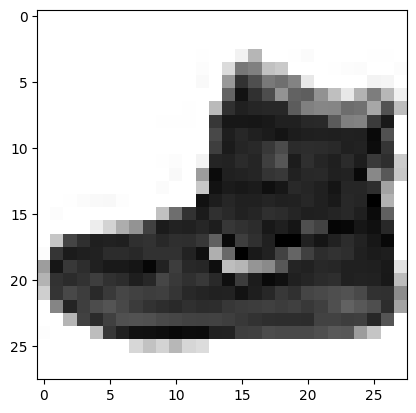

In [8]:
plt.imshow(image, cmap = 'binary')
plt.show()

In [9]:
print(f"kelas untuk gambar indeks ke-{sample}: {class_mnist[y_train_full[sample]]}")

kelas untuk gambar indeks ke-0: Ankle Boot


In [10]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#model yg kemaren, bisa diskip

#model.add(keras.layers.Flatten(input_shape = [28, 28])) #mengubah input menjadi 1D array
#model.add(keras.layers.Dense(300, activation = 'relu')) #hidden layer 1 dgn 300 neuron dan activation Relu
#model.add(keras.layers.Dense(100, activation = 'relu')) #hidden layer 2 dgn 100 neuron dan activation Relu
#model = keras.models.Sequential()
#model.add(keras.layers.Dense(10, activation = 'softmax')) #hidden layer 1 dgn 300 neuron dan activation Relu

# Hyperparameter Tuning dengan Keras-Tuner

## Membangun Model

In [11]:
def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28])) #input layer

    hp_layers = hp.Choice('layer', [2,3]) #banyak hidden layer 2 atau 3
    hp_neurons = hp.Int('neuron', min_value = 100, max_value=300, step = 100) #banyak neuron disetiap layer 100, 20

    for layer in range(hp_layers):
        model.add(keras.layers.Dense(hp_neurons, activation = 'relu')) #hidden layer
    model.add(keras.layers.Dense(10, activation = 'softmax')) #output layer
    
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss = 'sparse_categorical_crossentropy', #model compile
                  optimizer = optimizer,
                  metrics = ['accuracy'])

    return model

In [12]:
#hyperband tuner
tuner = kt.Hyperband(build_model,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     directory = 'my_dir',
                     project_name = 'my_tuner')

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 5)

In [14]:
#proses pencarian hyperparameter terbaik
tuner.search(X_train, y_train,
             epochs = 50,
             validation_data = [X_valid, y_valid],
             callbacks = [stop_early])

Trial 6 Complete [00h 00m 24s]
val_accuracy: 0.8704000115394592

Best val_accuracy So Far: 0.8781999945640564
Total elapsed time: 00h 02m 02s


In [15]:
best_hps = tuner.get_best_hyperparameters()[0]
print("best number of layers: ", best_hps.get('layer'))
print("best number of neurons: ", best_hps.get('neuron'))

best number of layers:  3
best number of neurons:  300


In [16]:
#model terbaik
model = tuner.hypermodel.build(best_hps)

#training dengan model terbaik
model.fit(X_train, y_train, 
          epochs = 10,
          validation_data = [X_valid, y_valid])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7711 - loss: 0.6256 - val_accuracy: 0.8666 - val_loss: 0.3779
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8598 - loss: 0.3748 - val_accuracy: 0.8778 - val_loss: 0.3538
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8772 - loss: 0.3309 - val_accuracy: 0.8848 - val_loss: 0.3173
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8830 - loss: 0.3109 - val_accuracy: 0.8868 - val_loss: 0.3139
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8886 - loss: 0.2921 - val_accuracy: 0.8796 - val_loss: 0.3163
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8994 - loss: 0.2675 - val_accuracy: 0.8876 - val_loss: 0.3087
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9024 - loss: 0.2577 - val_accuracy: 0.8906 - val_loss: 0.3070
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9091 - loss: 0

## Memprediksi dengan model

In [17]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 45.0263


[45.98220443725586, 0.8651000261306763]

In [18]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_p = np.array([np.argmax(i) for i in y_proba]) #mendapatka kelas
print(y_p)
print(np.array(class_mnist)[y_p])

[9 2 1 1]
['Ankle Boot' 'Pullover' 'Trouser' 'Trouser']
